In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

%run ../load_magic/dataframes.py

In [3]:

# From https://en.wikipedia.org/wiki/List_of_religious_populations
html_str = '''
    <table style="text-align:left; border-collapse:collapse; width:30%;">
    <tbody><tr style="background:#ddd"><th style="text-align:center;" colspan="5">Size of major religious groups, 2020</th></tr>
    <tr style="font-size:88%; height:4px;">
    <td colspan="2" style="padding:0 4px; text-align:right;"><b>Religion</b></td>
    <td style="width:100px; text-align:left;"></td>
    <td colspan="2" style="padding:0 4px; width:1em; text-align:right;"><b>Percent</b></td>
    </tr>
    <tr>
    <td colspan="2" style="padding-left: 0.4em; padding-right: 0.4em; min-width: 8em;">Christianity</td>
    <td style="width: 100px; border-left: solid 1px silver; border-right: solid 1px silver;"><div style="background:#007FFF; width:31.11%; overflow: hidden;"> </div></td>
    <td colspan="2" style="padding-left: 1.2em; padding-right: 0.4em; text-align: right;">31.11%</td>
    </tr>
    <tr>
    <td colspan="2" style="padding-left: 0.4em; padding-right: 0.4em; min-width: 8em;">Islam</td>
    <td style="width: 100px; border-left: solid 1px silver; border-right: solid 1px silver;"><div style="background:#009900; width:24.90%; overflow: hidden;"> </div></td>
    <td colspan="2" style="padding-left: 1.2em; padding-right: 0.4em; text-align: right;">24.90%</td>
    </tr>
    <tr>
    <td colspan="2" style="padding-left: 0.4em; padding-right: 0.4em; min-width: 8em;">Unaffiliated</td>
    <td style="width: 100px; border-left: solid 1px silver; border-right: solid 1px silver;"><div style="background:#848482; width:15.58%; overflow: hidden;"> </div></td>
    <td colspan="2" style="padding-left: 1.2em; padding-right: 0.4em; text-align: right;">15.58%</td>
    </tr>
    <tr>
    <td colspan="2" style="padding-left: 0.4em; padding-right: 0.4em; min-width: 8em;">Hinduism</td>
    <td style="width: 100px; border-left: solid 1px silver; border-right: solid 1px silver;"><div style="background:#FF7F00; width:15.16%; overflow: hidden;"> </div></td>
    <td colspan="2" style="padding-left: 1.2em; padding-right: 0.4em; text-align: right;">15.16%</td>
    </tr>
    <tr>
    <td colspan="2" style="padding-left: 0.4em; padding-right: 0.4em; min-width: 8em;">Buddhism</td>
    <td style="width: 100px; border-left: solid 1px silver; border-right: solid 1px silver;"><div style="background:#FFFF00; width:6.62%; overflow: hidden;"> </div></td>
    <td colspan="2" style="padding-left: 1.2em; padding-right: 0.4em; text-align: right;">6.62%</td>
    </tr>
    <tr>
    <td colspan="2" style="padding-left: 0.4em; padding-right: 0.4em; min-width: 8em;">Folk religions</td>
    <td style="width: 100px; border-left: solid 1px silver; border-right: solid 1px silver;"><div style="background:#ED2939; width:5.61%; overflow: hidden;"> </div></td>
    <td colspan="2" style="padding-left: 1.2em; padding-right: 0.4em; text-align: right;">5.61%</td>
    </tr>
    <tr>
    <td colspan="2" style="padding-left: 0.4em; padding-right: 0.4em; min-width: 8em;">Other religions</td>
    <td style="width: 100px; border-left: solid 1px silver; border-right: solid 1px silver;"><div style="background:#808080; width:0.79%; overflow: hidden;"> </div></td>
    <td colspan="2" style="padding-left: 1.2em; padding-right: 0.4em; text-align: right;">0.79%</td>
    </tr>

    </tbody></table>'''

In [4]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, osp.join('..', 'py'))

from storage import Storage
from stats_scraping_utils import StatsScrapingUtilities

s = Storage()
ssu = StatsScrapingUtilities(s=s)
df = ssu.get_page_tables(html_str, verbose=False)[0].copy()
df = df.drop(columns=['Size of major religious groups, 2020.1', 'Size of major religious groups, 2020.2',
                      'Size of major religious groups, 2020.3'])
df.columns = df.loc[0].tolist()
df = df.drop([0])
df

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


,Religion,Percent
1,Christianity,31.11%
2,Islam,24.90%
3,Unaffiliated,15.58%
4,Hinduism,15.16%
5,Buddhism,6.62%
6,Folk religions,5.61%
7,Other religions,0.79%


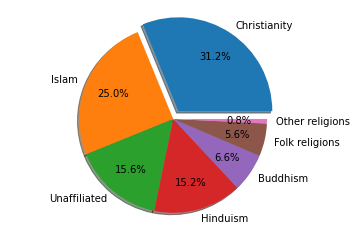

In [5]:

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df.Religion.tolist()
sizes = df.Percent.map(lambda x: float(x.strip('%'))).tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the first slice (i.e. 'Christianity')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0,
        pctdistance=0.7, labeldistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()